In [122]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [155]:
te0 = pd.read_csv('TE_t0.csv')
te1 = pd.read_csv('TE_t1.csv')
te2 = pd.read_csv('TE_t2.csv')

In [156]:
filteredGeneList = pd.read_csv('../../../RBC/Database/filteredGenesDetails_human_240118.txt',sep='\t')
acc2gene={}
for idx,row in filteredGeneList.iterrows():
    acc2gene[row['AccNum']] = row['GeneName']

In [157]:
comb=pd.DataFrame({"AccNum": list(te0['Unnamed: 0'])})

In [158]:
comb['Gene'] = comb['AccNum'].map(acc2gene)
comb['TE_t0'] = te0['log2FoldChange']
comb['TE_t1'] = te1['log2FoldChange']
comb['TE_t2'] = te2['log2FoldChange']

In [171]:
comb.index=comb['Gene']
comb.pop('Gene')
comb.pop('AccNum')

KeyError: 'Gene'

In [160]:
comb.head()

,TE_t0,TE_t1,TE_t2
Gene,,,
ODR4,-0.659674,-0.405183,-1.156968
ATP5S,0.536468,0.735339,0.898277
BICD2,-0.712167,-0.857090,-0.698393
ESF1,0.330074,0.439600,-0.012359
THEM6,-0.626665,-0.557044,-0.264365


/Users/Yue/opt/anaconda3/lib/python3.7/site-packages/seaborn/matrix.py:624: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


7990
7990
7990


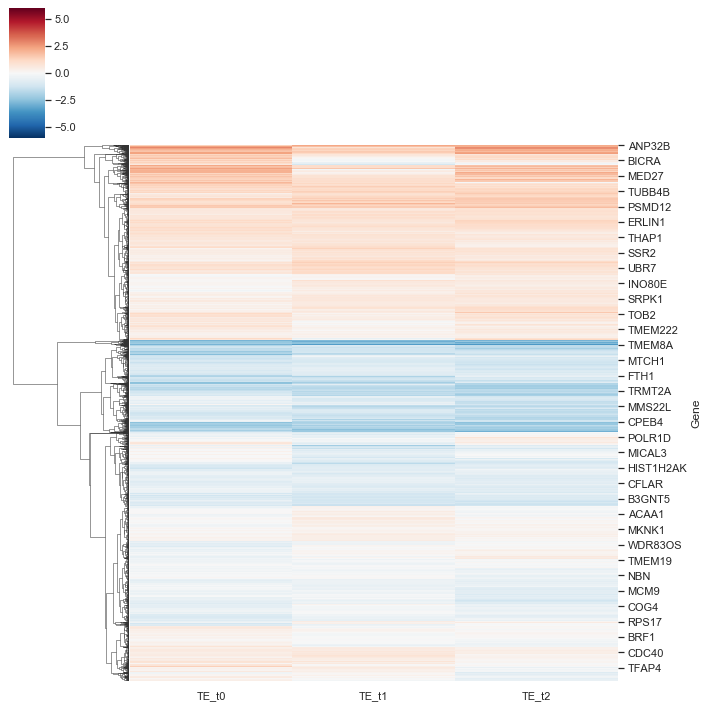

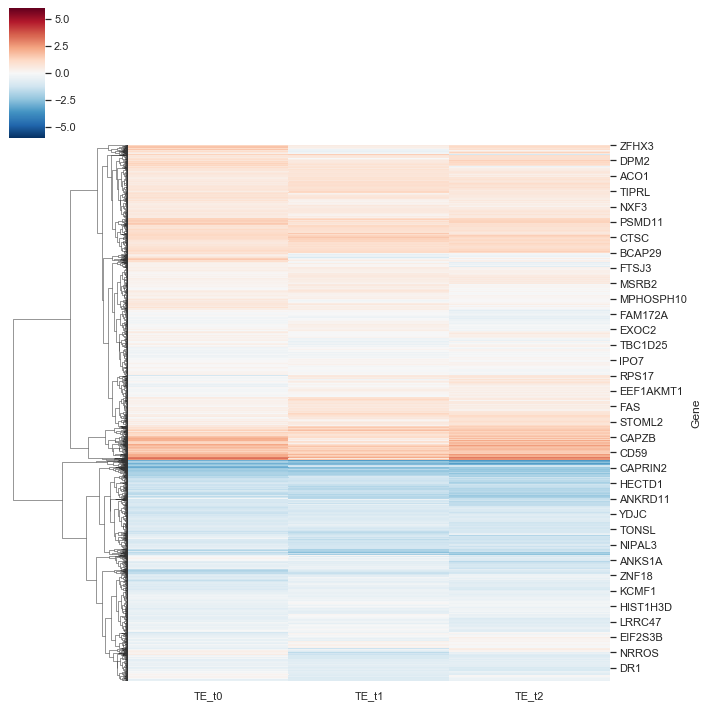

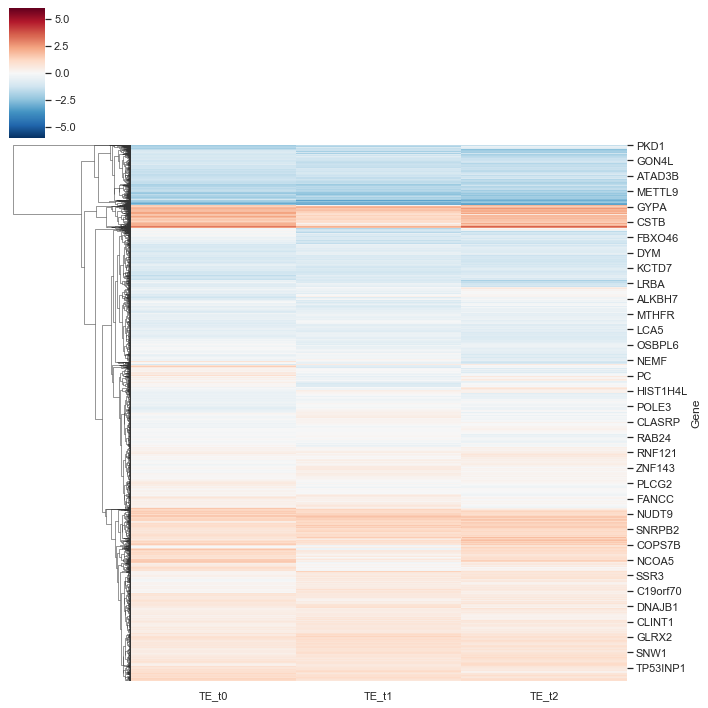

In [129]:
sns.set_palette(sns.color_palette("RdBu_r"))
sns.set()
metric = 'cityblock'
for method in ['weighted','complete','average']:
    ax = sns.clustermap(comb,method=method,
                        col_cluster=False,
                        metric=metric,
                        cmap = "RdBu_r",
                        center=0,vmin=-6, vmax=6,
                        figsize=(10,10)
                       )
    n = len(comb)
    print(n)
    ax.savefig('TE heatmap '+method+' '+metric+'.png', dpi=300)
    #f.set_title('Polysome Mass spec heatmap N = '+ str(n))

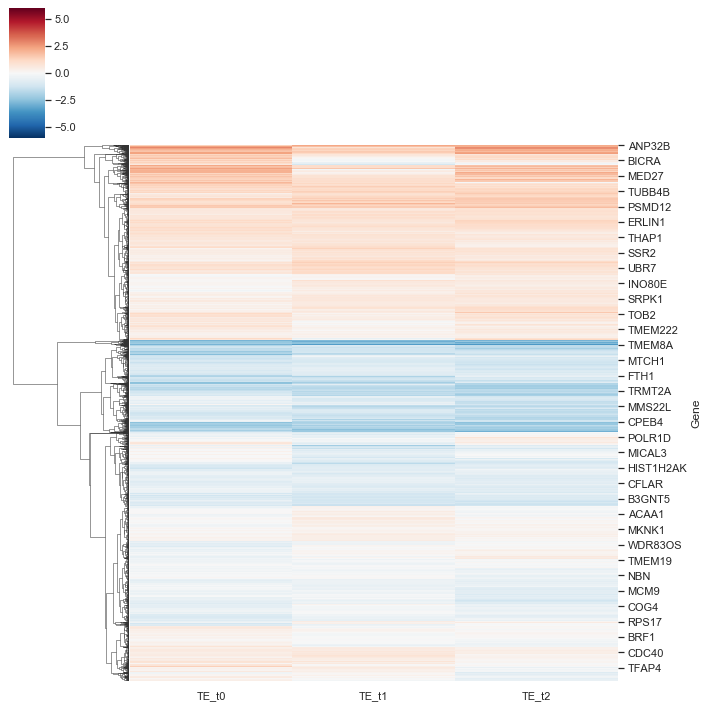

In [161]:
from scipy.spatial import distance
from scipy.cluster import hierarchy

dist = distance.pdist(comb)
metric = 'cityblock'
method = 'weighted'
row_linkage = hierarchy.linkage(
    distance.pdist(comb,metric), method=method)

ax = sns.clustermap(comb,#method=method,
                    row_linkage=row_linkage,
                    col_cluster=False,
                    #metric=metric,
                    cmap = "RdBu_r",
                    center=0,vmin=-6, vmax=6,
                    figsize=(10,10)
                   )


In [162]:
row_linkage

array([[1.48700000e+03, 3.55300000e+03, 3.83858556e-03, 2.00000000e+00],
       [1.31300000e+03, 7.71000000e+03, 4.01742833e-03, 2.00000000e+00],
       [6.95600000e+03, 7.61100000e+03, 4.20297847e-03, 2.00000000e+00],
       ...,
       [1.59690000e+04, 1.59740000e+04, 5.44241134e+00, 5.01000000e+03],
       [1.59710000e+04, 1.59760000e+04, 8.00630382e+00, 5.07700000e+03],
       [1.59750000e+04, 1.59770000e+04, 1.28306145e+01, 7.99000000e+03]])

In [170]:
from scipy.cluster.hierarchy import fcluster

res=fcluster(row_linkage, t=3.5, criterion='distance')

np.max(res)

9

In [172]:
comb['cluster'] = res

In [173]:
comb_reorder=comb.iloc[ax.dendrogram_row.reordered_ind]
comb_reorder

,TE_t0,TE_t1,TE_t2,cluster
Gene,,,,
ANP32B,3.996411,3.060268,3.667341,1
HNRNPH3,3.545291,3.023251,3.335121,1
HSPB1,2.687222,2.818400,3.234202,1
ELANE,2.781527,1.778831,3.460091,1
YWHAE,3.125523,2.203413,3.116185,1
...,...,...,...,...
CLCN7,0.384016,-0.173006,-0.441453,7
POU2F1,0.367320,-0.132388,-0.436844,7
ZNF777,0.343272,-0.328980,-0.419020,7


In [66]:
#res = hierarchy.cut_tree(row_linkage, n_clusters=7)
#[item for sublist in res for item in sublist]

In [174]:
#comb.sort_values(by='cluster').to_csv('7clusters.csv')
comb_reorder.to_csv('TE '+method+' '+metric+' clusters.csv')

In [168]:
max(res)

8